## __Analysis of Toronto Neighborhoods__

This notebook contains an analysis of the 140 neighbourhoods in the city of Toronto. 
Datasets from several sources are retrieved and combined to develop a profile for each of the neighbourhoods based on the population characteristics and distribution of venues located in its boundaries. These profiles are used to group neighbourhoods into similar clusters and to identify the ideal locations in the city for an artisan bakery of pastries from Guyana.   

### __[1] Neighbourhood Profiles - Feature Analysis__

This section of the notebook develops a profile for each of the neighbourhoods based on a selected set of definitional, demographic, economic and safety attributes. These profiles are used to rank order the neighbourhoods in order to determine the best locations for the pastry shop. The determination of best locations is further enhanced by grouping neighbourhoods into clusters based on the similarity of the selected features.

#### __INITIALIZATION__

In [1]:
# Load modules

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim 
import folium
import time


#### __DATA EXTRACTION__

__Neighbourhood Definition Attributes__

In [2]:
# Retrieve a listing of administrative areas and boroughs in the expanded Greater Toronto Area from Wikipedia page.
# This dataset contains a unique numeric code for the neighbourhood areas, descriptive names and the related boroughs.

import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto#Lists_of_city-designated_neighbourhoods"
df_gta = pd.read_html(url, match="CDN number") [0]
df_gta.drop(columns=df_gta.columns[[3,4,5]], inplace=True)
df_gta.columns=["Code", "Neighbourhood", "Borough"]
df_gta


,Code,Neighbourhood,Borough
0,129,Agincourt North,Scarborough
1,128,Agincourt South-Malvern West,Scarborough
2,20,Alderwood,Etobicoke
3,95,Annex,Old City of Toronto
4,42,Banbury-Don Mills,North York
...,...,...,...
135,94,Wychwood,Old City of Toronto
136,100,Yonge and Eglinton,Old City of Toronto
137,97,Yonge-St.Clair,Old City of Toronto
138,27,York University Heights,North York


In [3]:
# Print row count statistics for the dataframe

print("Dataframe: \t\t", "df_gta")
print("Dataframe shape: \t", df_gta.shape)
print("Number of rows: \t", df_gta.shape[0])
print("Boroughs: \t\t", len(df_gta["Borough"].unique()))
print("Neighbourhoods: \t", len(df_gta["Neighbourhood"].unique()))


Dataframe: 		 df_gta
Dataframe shape: 	 (140, 3)
Number of rows: 	 140
Boroughs: 		 6
Neighbourhoods: 	 140


In [4]:
# Retrieve defitional attributes from neighnourhood dataset on the Toronto Open Data Portal

filename = "Neighbourhoods.csv"
df_nh = pd.read_csv(filename)
df_nh


,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry,CLASSIFICATION,CLASSIFICATION_CODE
0,10501,2480141,26005521,NaN,96,96,Casa Loma (96),Casa Loma (96),NaN,NaN,NaN,NaN,17545105,3.678385e+06,8214.176485,"{u'type': u'Polygon', u'coordinates': (((-79.4...",NaN,NaN
1,10502,2480140,26005520,NaN,95,95,Annex (95),Annex (95),NaN,NaN,NaN,NaN,17545121,5.337192e+06,10513.883143,"{u'type': u'Polygon', u'coordinates': (((-79.3...",NaN,NaN
2,10503,2480139,26005519,NaN,109,109,Caledonia-Fairbank (109),Caledonia-Fairbank (109),NaN,NaN,NaN,NaN,17545137,2.955857e+06,6849.911724,"{u'type': u'Polygon', u'coordinates': (((-79.4...",NaN,NaN
3,10504,2480064,26005444,NaN,64,64,Woodbine Corridor (64),Woodbine Corridor (64),NaN,NaN,NaN,NaN,17545153,3.052518e+06,7512.966773,"{u'type': u'Polygon', u'coordinates': (((-79.3...",NaN,NaN
4,10505,2480063,26005443,NaN,103,103,Lawrence Park South (103),Lawrence Park South (103),NaN,NaN,NaN,NaN,17545169,6.211341e+06,13530.370002,"{u'type': u'Polygon', u'coordinates': (((-79.4...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,10636,2480142,26005522,NaN,126,126,Dorset Park (126),Dorset Park (126),NaN,NaN,NaN,NaN,17547265,1.153256e+07,14645.384509,"{u'type': u'Polygon', u'coordinates': (((-79.2...",Emerging Neighbourhood,EN
136,10637,2480068,26005448,NaN,133,133,Centennial Scarborough (133),Centennial Scarborough (133),NaN,NaN,NaN,NaN,17547281,1.049677e+07,16683.674975,"{u'type': u'Polygon', u'coordinates': (((-79.1...",NaN,NaN
137,10638,2480067,26005447,NaN,22,22,Humbermede (22),Humbermede (22),NaN,NaN,NaN,NaN,17547297,8.478390e+06,17227.580237,"{u'type': u'Polygon', u'coordinates': (((-79.5...",Neighbourhood Improvement Area,NIA
138,10639,2480066,26005446,NaN,37,37,Willowdale West (37),Willowdale West (37),NaN,NaN,NaN,NaN,17547313,5.533653e+06,10354.990437,"{u'type': u'Polygon', u'coordinates': (((-79.4...",NaN,NaN


In [5]:
# Print row count statistics for the dataframe

print("Dataframe: \t\t", "df_nh")
print("Dataframe shape: \t", df_nh.shape)
print("Number of rows: \t", df_nh.shape[0])
print("Boroughs: \t\t", "Not Available")
print("Neighbourhoods: \t", len(df_nh["AREA_SHORT_CODE"].unique()))


Dataframe: 		 df_nh
Dataframe shape: 	 (140, 18)
Number of rows: 	 140
Boroughs: 		 Not Available
Neighbourhoods: 	 140


__Neigbourhood Demographic Attributes__

In [6]:
# Retrieve general population attributes from the wellbeing population dataset on the Toronto Open Data Portal  

filename = "wellbeing-toronto-population-total-2011-2016-and-age-groups-2016.xlsx"
df_pop = pd.read_excel(filename, sheet_name="016 Pop_TotalChange")
df_pop


,HoodID,Neighbourhood,Pop2016,Pop2011,PopChg11t16
0,1,West Humber-Clairville,33312,34100,-0.023109
1,2,Mount Olive-Silverstone-Jamestown,32954,32788,0.005063
2,3,Thistletown-Beaumond Heights,10360,10138,0.021898
3,4,Rexdale-Kipling,10529,10488,0.003909
4,5,Elms-Old Rexdale,9456,9550,-0.009843
...,...,...,...,...,...
135,136,West Hill,27392,26547,0.031830
136,137,Woburn,53485,53350,0.002530
137,138,Eglinton East,22776,22829,-0.002322
138,139,Scarborough Village,16724,16609,0.006924


In [7]:
# Print row count statistics for the dataframe

print("Filename: \t\t", filename)
print("Dataframe: \t\t", "df_pop")
print("Dataframe shape: \t", df_pop.shape)
print("Number of rows: \t", df_pop.shape[0])
print("Neighbourhoods: \t", len(df_pop["Neighbourhood"].unique()))


Filename: 		 wellbeing-toronto-population-total-2011-2016-and-age-groups-2016.xlsx
Dataframe: 		 df_pop
Dataframe shape: 	 (140, 5)
Number of rows: 	 140
Neighbourhoods: 	 140


In [8]:
# Retrieve expat population attributes from the neighbourhood profiles dataset on the Toronto Open Data Portal  

filename = "neighbourhood-profiles-2016-csv.xlsx"
df_nhp = pd.read_excel(filename, sheet_name="neighbourhood-profiles-2016-csv",skiprows=0)
df_nhp


,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016",2731571.000,29113,23757,12054,30526,...,16936,22156,53485,12541,7865,14349,11817,12528,27593,14804
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011",2615060.000,30279,21988,11904,29177,...,15004,21343,53350,11703,7826,13986,10578,11652,27713,14687
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,0.045,-0.039,0.08,0.013,0.046,...,0.129,0.038,0.003,0.072,0.005,0.026,0.117,0.075,-0.004,0.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,2379,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Migrants,400950.000,3170,3145,925,6390,...,3765,2270,7260,985,620,1350,2425,2310,4965,1345
2379,2380,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Internal migrants,184120.000,880,980,680,3930,...,1545,1110,1720,610,395,780,1260,1355,1700,580
2380,2381,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Intraprovincial migrants,141135.000,735,760,615,2630,...,1070,960,1400,350,320,570,970,1025,1490,445
2381,2382,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Interprovincial migrants,42985.000,135,220,70,1310,...,475,150,335,250,85,210,290,325,195,135


In [9]:
# Print row count statistics for the dataframe
 
print("Filename: \t\t", filename)
print("Dataframe: \t\t", "df_nhp")
print("Dataframe shape: \t", df_nhp.shape)
print("Number of rows: \t", df_nhp.shape[0])
print("Neighbourhoods: \t", len(df_nhp.columns)-6)


Filename: 		 neighbourhood-profiles-2016-csv.xlsx
Dataframe: 		 df_nhp
Dataframe shape: 	 (2383, 146)
Number of rows: 	 2383
Neighbourhoods: 	 140


__Neighbourhood Economic Attributes__

In [10]:
# Retrieve neighbourhood economic attributes from the wellbeing economics dataset on the Toronto Open Data Portal  

filename = "wellbeing-toronto-economics.xlsx"
df_eco = pd.read_excel(filename, sheet_name="RawData-Ref Period 2011",skiprows=1)
df_eco


,Neighbourhood,Neighbourhood Id,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients
0,West Humber-Clairville,1,2463,195,719,317508,58271,2912
1,Mount Olive-Silverstone-Jamestown,2,271,60,687,251119,3244,6561
2,Thistletown-Beaumond Heights,3,217,25,718,414216,1311,1276
3,Rexdale-Kipling,4,144,75,721,392271,1178,1323
4,Elms-Old Rexdale,5,67,60,692,233832,903,1683
...,...,...,...,...,...,...,...,...
135,West Hill,136,424,153,706,308229,4500,4974
136,Woburn,137,1073,214,723,316584,16190,6747
137,Eglinton East,138,296,143,705,274020,2351,4171
138,Scarborough Village,139,228,217,699,356096,1851,4133


In [11]:
# Print row count statistics for the dataframe

print("Filename: \t\t", filename)
print("Dataframe: \t\t", "df_eco")
print("Dataframe shape: \t", df_eco.shape)
print("Number of rows: \t", df_eco.shape[0])
print("Neighbourhoods: \t", len(df_eco["Neighbourhood"].unique()))

Filename: 		 wellbeing-toronto-economics.xlsx
Dataframe: 		 df_eco
Dataframe shape: 	 (140, 8)
Number of rows: 	 140
Neighbourhoods: 	 140


__Neighbourhood Safety Attributes__

In [12]:
# Retrieve neighbourhood safety attributes from the wellbeing safety dataset on the Toronto Open Data Portal  

filename = "wellbeing-toronto-safety.xlsx"
df_sft = pd.read_excel(filename, sheet_name="RawData-Ref Period 2011", skiprows=1)
df_sft


,Neighbourhood,Neighbourhood Id,Arsons,Assaults,Break & Enters,Drug Arrests,Fire Medical Calls,Fire Vehicle Incidents,Fires & Fire Alarms,Hazardous Incidents,Murders,Robberies,Sexual Assaults,Thefts,Total Major Crime Incidents,Vehicle Thefts
0,West Humber-Clairville,1,4,390,175,62,1321,502,705,210,0,82,68,54,1119,288
1,Mount Olive-Silverstone-Jamestown,2,3,316,61,90,1016,59,361,176,1,78,75,7,690,62
2,Thistletown-Beaumond Heights,3,0,85,36,16,323,48,90,34,0,17,24,2,192,12
3,Rexdale-Kipling,4,0,59,32,15,305,34,94,55,1,16,20,3,164,18
4,Elms-Old Rexdale,5,1,77,25,14,321,71,107,43,0,23,5,19,185,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,West Hill,136,3,387,102,87,1145,78,338,142,1,71,52,3,749,46
136,Woburn,137,2,412,128,77,1469,219,504,223,3,107,29,7,808,45
137,Eglinton East,138,0,239,88,48,720,76,223,111,1,66,17,10,492,23
138,Scarborough Village,139,1,226,93,31,652,35,180,94,1,62,31,3,474,27


In [13]:
# Print row count statistics for the dataframe

print("Filename: \t\t", filename)
print("Dataframe: \t\t", "df_sft")
print("Dataframe shape: \t", df_sft.shape)
print("Number of rows: \t", df_sft.shape[0])
print("Neighbourhoods: \t", len(df_sft["Neighbourhood"].unique()))


Filename: 		 wellbeing-toronto-safety.xlsx
Dataframe: 		 df_sft
Dataframe shape: 	 (140, 16)
Number of rows: 	 140
Neighbourhoods: 	 140


#### __DATA ENHANCEMENT__

In [14]:
# Retrieve the neighbourhood geocode coordinates using a Nominatim lookup as missing from the neighnourhood dataset 
# This process was repeated several times as the Nominatim lookup failed for some of the neighbourhood addresses 

import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim 
import time

reload = True
if reload: # load previous version of geo file
   df_geo = pd.read_csv('df_geo.csv', index_col=0)
else: 
   df_geo = df_gta.loc[:, ["Code", "Neighbourhood", "Borough", "Latitude", "Longitude"]]

wait = 1  # seconds wait time between requests as Nominatim requires a max of 1 request per second
max_tries = 300
app = Nominatim(user_agent="gta")

for i in range(len(df_geo["Code"])):
    
   # only lookup geocode for unassigned entries
   if not(np.isnan(df_geo.loc[i,"Latitude"])) and not(np.isnan(df_geo.loc[i,"Longitude"])):
      continue
        
   address = df_geo.loc[i,"Neighbourhood"] + ", " + df_geo.loc[i,"Borough"] + ", " + "Ontario, Canada"
   g = app.geocode(address)   

   if g is None: 
      j=0
      # split the neighbourhood address and lookup each subarea and the original separately
      address_list = [neighbourhood] + neighbourhood.split("-")
      while j < max_tries:
         for k in address_list:
            address = k + ", " + df_gta.loc[i,"Borough"] + ", " + "Ontario, Canada"
            g = geolocator.geocode(address)            
            if g != None:
               break
         j=j+1
        
   if g != None: 
      df_geo.loc[i,"Latitude"] =  g.latitude 
      df_geo.loc[i,"Longitude"] =  g.longitude    
      print('{} \t({} {}) \t\t\t{})'.format(i, g.latitude, g.longitude, address))
        
   time.sleep(wait)

df_geo.to_csv('df_geo.csv')
df_geo


,Code,Neighbourhood,Borough,Latitude,Longitude
0,1,West Humber-Clairville,Etobicoke,43.723370,-79.597457
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,43.643560,-79.565630
2,3,Thistletown-Beaumond Heights,Etobicoke,43.737270,-79.565320
3,4,Rexdale-Kipling,Etobicoke,43.721944,-79.571944
4,5,Elms-Old Rexdale,Etobicoke,43.721770,-79.552170
...,...,...,...,...,...
135,136,West Hill,Scarborough,43.768910,-79.187290
136,137,Woburn,Scarborough,43.759820,-79.225290
137,138,Eglinton East,Scarborough,43.739460,-79.232100
138,139,Scarborough Village,Scarborough,43.743740,-79.211630


#### __DATA PREPARATION__

In [15]:
# Add the neighbourhood geographical attributes to the base dataframe

df_tmp = df_nh[["AREA_SHORT_CODE", "LATITUDE", "LONGITUDE", "Shape__Area"]]
df_tmp.columns = ["Code", "Latitude", "Longitude", "Area"]

df_gta = pd.merge(df_gta, df_tmp, on="Code", how="left").sort_values(by="Code")
 

In [16]:
# Update the geocode coordinates in the base dataframe

df_gta[["Latitude", "Longitude"]] = df_geo.loc[:, ["Latitude", "Longitude"]]


In [17]:
# Add the neighbourhood general population attributes to the base dataframe

df_tmp = df_pop[["HoodID", "Pop2016"]]
df_tmp.columns = ["Code", "Population"]

df_gta = pd.merge(df_gta, df_tmp, on="Code", how="left").sort_values(by="Code")


In [18]:
# Add the neighbourhood expat population attributes to the base dataframe

df_tmp = df_nhp[(df_nhp["Characteristic"]=="Neighbourhood Number") | (df_nhp["Characteristic"]=="    Guyana")].T[6:].reset_index()
df_tmp.columns = ["Neighbourhood", "Code", "Expats"]
df_tmp.drop(columns=["Neighbourhood"], axis=1, inplace=True)
df_tmp["Expats"] = df_tmp["Expats"].astype(int)

df_gta = pd.merge(df_gta, df_tmp, on="Code", how="left").sort_values(by="Code")


In [19]:
# Add the neighbourhood economic attributes to the base dataframe

df_tmp = df_eco[["Neighbourhood Id", "Businesses", "Local Employment", "Home Prices"]]
df_tmp.columns = ["Code", "Businesses", "LocalEmployment", "HomePrices"]

df_gta = pd.merge(df_gta, df_tmp, on="Code", how="left").sort_values(by="Code")
 

In [20]:
# Add the neighbourhood safety attributes to the base dataframe

df_tmp = df_sft[["Neighbourhood Id", "Total Major Crime Incidents", "Vehicle Thefts"]]
df_tmp.columns = ["Code", "MajorCrimes", "VehicleThefts"]

df_gta = pd.merge(df_gta, df_tmp, on="Code", how="left").sort_values(by="Code")


In [21]:
# Save the dataframe to file

df_gta.to_csv('df_gta.csv')


In [22]:
# Read the dataframe from file

df_gta = pd.read_csv('df_gta.csv', index_col=0)
df_gta


,Code,Neighbourhood,Borough,Latitude,Longitude,Area,Population,Expats,Businesses,LocalEmployment,HomePrices,MajorCrimes,VehicleThefts
0,1,West Humber-Clairville,Etobicoke,43.735990,-79.276510,5.775131e+07,33312,1895,2463,58271,317508,1119,288
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,43.657000,-79.428000,8.893568e+06,32954,1510,271,3244,251119,690,62
2,3,Thistletown-Beaumond Heights,Etobicoke,43.779280,-79.303700,6.402351e+06,10360,215,217,1311,414216,192,12
3,4,Rexdale-Kipling,Etobicoke,43.729200,-79.403250,4.801397e+06,10529,200,144,1178,392271,164,18
4,5,Elms-Old Rexdale,Etobicoke,43.756868,-79.385751,5.616463e+06,9456,145,67,903,233832,185,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,West Hill,Scarborough,43.724880,-79.253970,1.846768e+07,27392,1090,424,4500,308229,749,46
136,137,Woburn,Scarborough,43.787490,-79.150770,2.366499e+07,53485,1530,1073,16190,316584,808,45
137,138,Eglinton East,Scarborough,43.737390,-79.410930,6.179031e+06,22776,910,296,2351,274020,492,23
138,139,Scarborough Village,Scarborough,43.690160,-79.475000,6.040096e+06,16724,580,228,1851,356096,474,27


In [23]:
# Print row count statistics for the dataframe

print("Dataframe: \t\t", "df_gta")
print("Dataframe shape: \t", df_gta.shape)
print("Number of rows: \t", df_gta.shape[0])
print("Boroughs: \t\t", len(df_gta["Borough"].unique()))
print("Neighbourhoods: \t", len(df_gta["Neighbourhood"].unique()))


Dataframe: 		 df_gta
Dataframe shape: 	 (140, 13)
Number of rows: 	 140
Boroughs: 		 6
Neighbourhoods: 	 140


#### __DATA EXPLORATION__

In [24]:
# Display basic statistics for the neighbourhood attributes  

cols = list(["Area", "Population", "Expats", "Businesses", "LocalEmployment", "HomePrices", "MajorCrimes", "VehicleThefts"])
df_gta_describe = df_gta[cols].describe()
df_gta_describe.to_csv('df_gta_describe.csv')
df_gta_describe


,Area,Population,Expats,Businesses,LocalEmployment,HomePrices,MajorCrimes,VehicleThefts
count,1.400000e+02,140.000000,140.000000,140.000000,140.0000,1.400000e+02,140.000000,140.000000
mean,8.794110e+06,19511.221429,246.250000,536.321429,9409.3500,5.481934e+05,351.128571,29.821429
std,8.950625e+06,10033.589222,401.939151,637.210719,19125.3383,2.676674e+05,235.957009,34.029033
min,8.113039e+05,6577.000000,0.000000,47.000000,438.0000,2.041040e+05,81.000000,3.000000
25%,3.563607e+06,12019.500000,45.000000,169.750000,2069.5000,3.749645e+05,185.000000,13.000000
50%,6.306846e+06,16749.500000,112.500000,345.500000,4052.5000,4.912100e+05,294.000000,21.000000
75%,1.037612e+07,23854.500000,235.000000,591.000000,10127.0000,5.902160e+05,412.500000,35.000000
max,7.214480e+07,65913.000000,2430.000000,4324.000000,185891.0000,1.849084e+06,1393.000000,288.000000


In [25]:
# Create a correlation marix to show relationships between neighbourhood attributes

df_gta_corr = df_gta[cols].corr()
df_gta_corr.to_csv('df_gta_corr.csv')
df_gta_corr


,Area,Population,Expats,Businesses,LocalEmployment,HomePrices,MajorCrimes,VehicleThefts
Area,1.000000,0.594385,0.600708,0.391879,0.276205,-0.115181,0.452036,0.725306
Population,0.594385,1.000000,0.514062,0.531127,0.410517,-0.258804,0.722708,0.493435
Expats,0.600708,0.514062,1.000000,0.165285,0.097120,-0.394373,0.481018,0.484816
Businesses,0.391879,0.531127,0.165285,1.000000,0.880345,-0.105364,0.730984,0.547749
LocalEmployment,0.276205,0.410517,0.097120,0.880345,1.000000,-0.069937,0.619937,0.372336
HomePrices,-0.115181,-0.258804,-0.394373,-0.105364,-0.069937,1.000000,-0.347745,-0.230936
MajorCrimes,0.452036,0.722708,0.481018,0.730984,0.619937,-0.347745,1.000000,0.617101
VehicleThefts,0.725306,0.493435,0.484816,0.547749,0.372336,-0.230936,0.617101,1.000000


__Observation:__
<br>
1. There is a strong correlation between the number of neighbourhood businesses, local employment, major crimes and vehicle thefts.
1. There is a strong correlation between the physical area and vehicle thefts. 
 

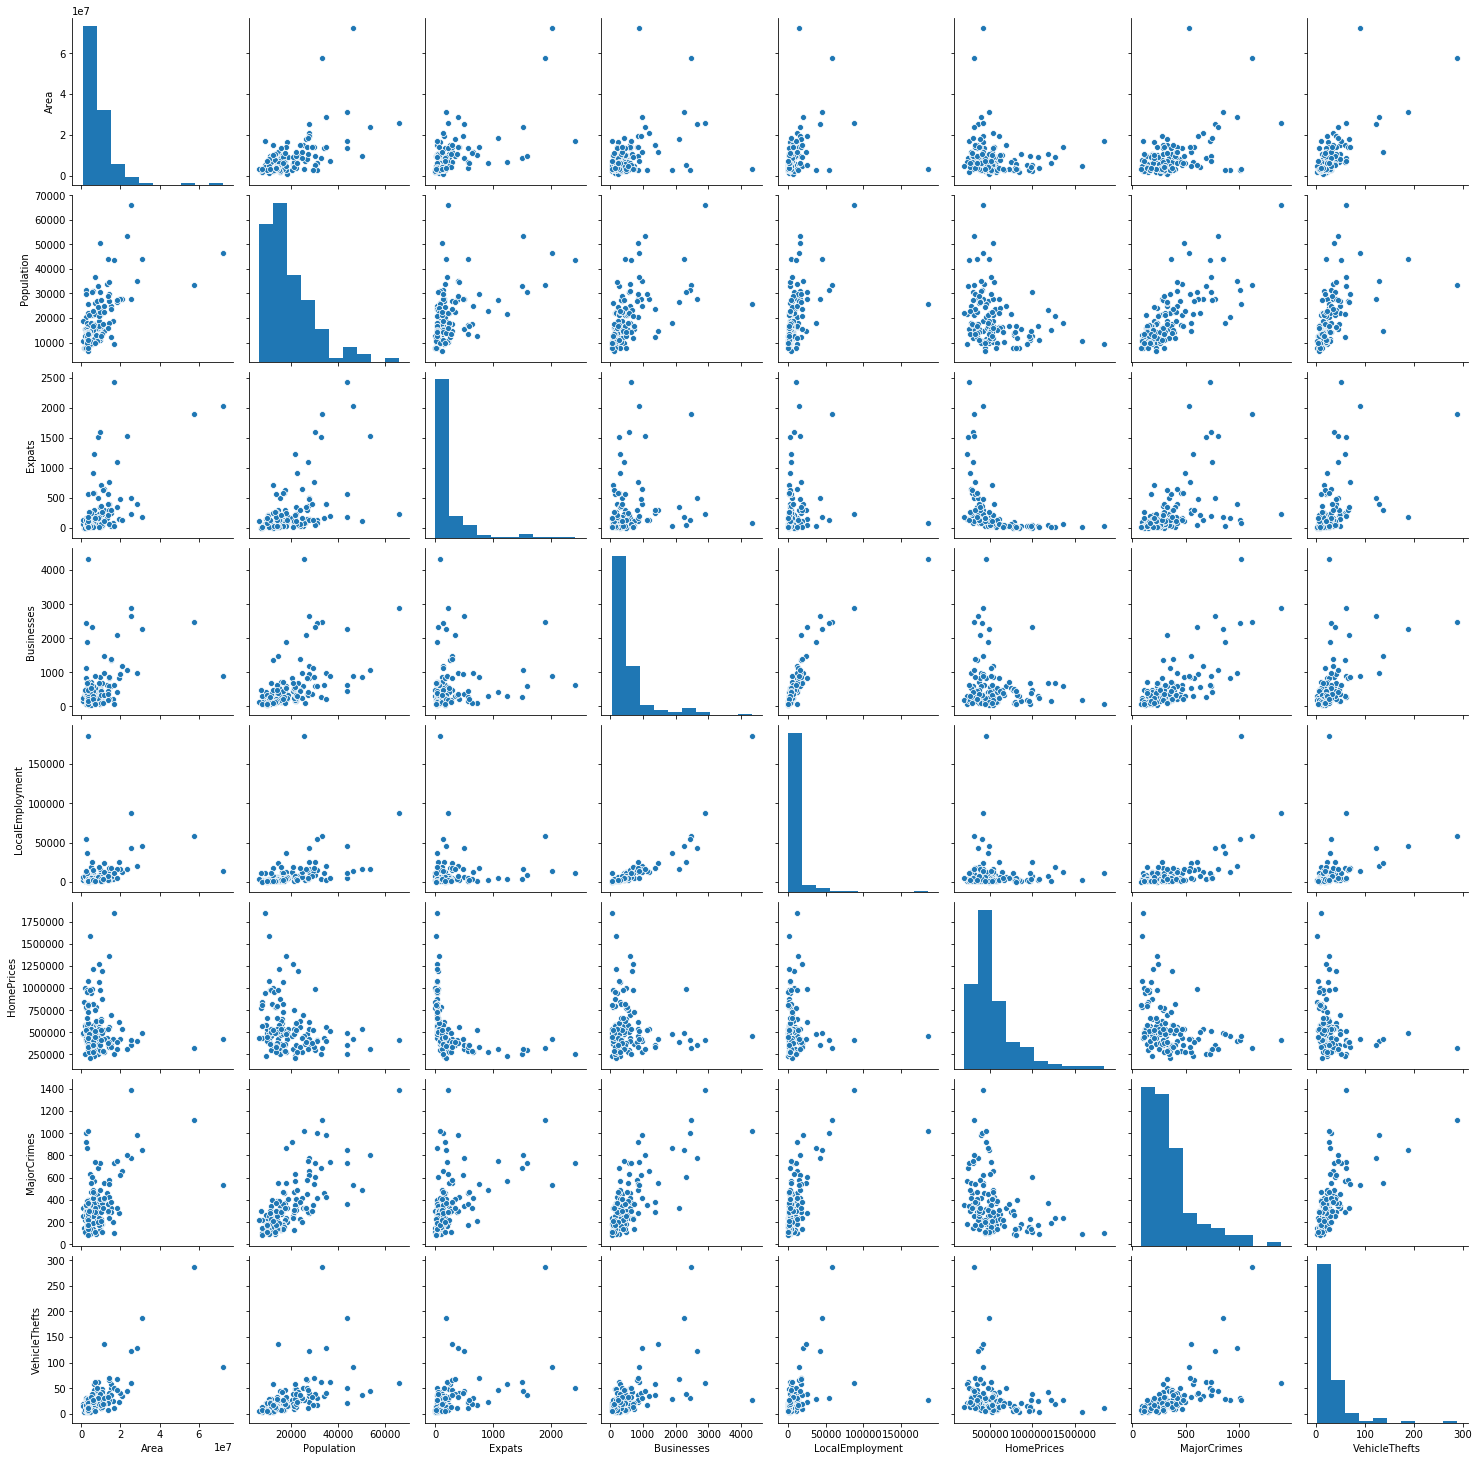

In [26]:
# Create a scatterplot marix to show the pairwise relationships between neighbourhood attributes

import seaborn as sns
sns.pairplot(df_gta[cols])


__Observation:__
1. The frequency distributions illustrate skewness with concentration in the lower ranges and some outliers in the outer ranges. 


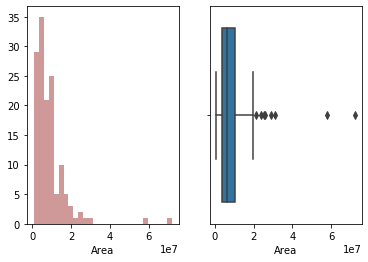

In [27]:
# Display frequency distribution and boxplot for the Area attribute

plt.subplot(1,2,1)
sns.distplot(df_gta.Area, color='darkred', kde=False)
plt.subplot(1,2,2)
sns.boxplot(x=df_gta['Area'])


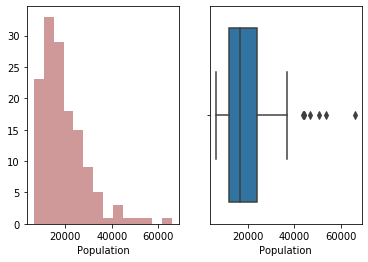

In [28]:
# Display frequency distribution and boxplot for the Population attribute

plt.subplot(1,2,1)
sns.distplot(df_gta.Population, color='darkred', kde=False)
plt.subplot(1,2,2)
sns.boxplot(x=df_gta['Population'])


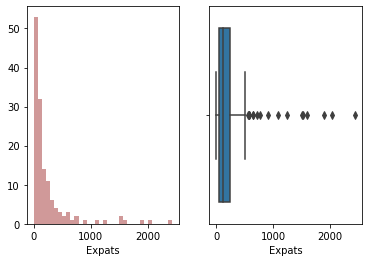

In [29]:
# Display frequency distribution and boxplot for the Expats attribute

plt.subplot(1,2,1)
sns.distplot(df_gta.Expats, color='darkred', kde=False)
plt.subplot(1,2,2)
sns.boxplot(x=df_gta['Expats'])


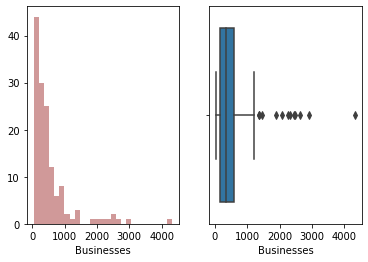

In [30]:
# Display frequency distribution and boxplot for the Businesses attribute

plt.subplot(1,2,1)
sns.distplot(df_gta.Businesses, color='darkred', kde=False)
plt.subplot(1,2,2)
sns.boxplot(x=df_gta['Businesses'])


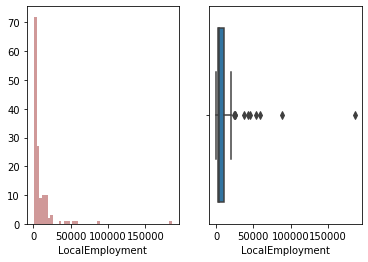

In [31]:
# Display frequency distribution and boxplot for the LocalEmployment attribute

plt.subplot(1,2,1)
sns.distplot(df_gta.LocalEmployment, color='darkred', kde=False)
plt.subplot(1,2,2)
sns.boxplot(x=df_gta['LocalEmployment'])


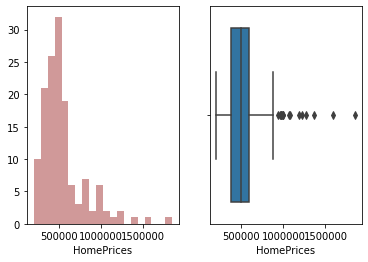

In [32]:
# Display frequency distribution and boxplot for the HomePrices attribute

plt.subplot(1,2,1)
sns.distplot(df_gta.HomePrices, color='darkred', kde=False)
plt.subplot(1,2,2)
sns.boxplot(x=df_gta['HomePrices'])


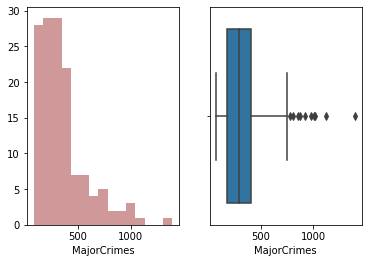

In [33]:
# Display frequency distribution and boxplot for the MajorCrimes attribute

plt.subplot(1,2,1)
sns.distplot(df_gta.MajorCrimes, color='darkred', kde=False)
plt.subplot(1,2,2)
sns.boxplot(x=df_gta['MajorCrimes'])


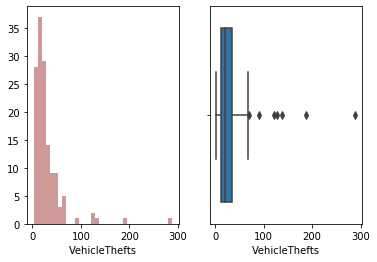

In [34]:
# Display frequency distribution and boxplot for the VehicleThefts attribute

plt.subplot(1,2,1)
sns.distplot(df_gta.VehicleThefts, color='darkred', kde=False)
plt.subplot(1,2,2)
sns.boxplot(x=df_gta['VehicleThefts'])


#### __DATA VISUALIZATION__

In [35]:
# Retrieve the latitude and longitude coordinates for the city of Toronto using a Nominatim lookup

from geopy.geocoders import Nominatim 

address = 'Toronto, Ontario, Canada'
app = Nominatim(user_agent="gta")
location = app.geocode(address)

lat_to = location.latitude
long_to = location.longitude


In [36]:
# Create map of the Greater Toronto Area and show neighbourhoods uning latitude and longitude coordinates

import folium

map_gta = folium.Map(location=[lat_to, long_to], titles="Toronto Neighbourhoods", zoom_start=12)

# add neighbourhood markers to folium map

for code, lat, long in zip(df_gta["Code"], df_gta["Latitude"], df_gta["Longitude"]):
   folium.Marker( 
      [lat, long],
      popup = folium.Popup('{}'.format(code), parse_html=True),
      color = 'blue',
      fill = True,
      fill_color = '#3186cc',
      fill_opacity = 0.7,
      parse_html = False).add_to(map_gta)  
    
map_gta


#### __MODEL DEVELOPMENT__

__Feature Ranking__

In [37]:
# compute an overall ranking for each of the neighbourhoods based on the individual attributes

df_rank = df_gta[["Code", "Neighbourhood", "Latitude", "Longitude"]].copy()

# rank neighbourhoods based on individual features

features = ["Area","Population","Expats","Businesses","LocalEmployment","HomePrices","MajorCrimes","VehicleThefts"]
order = [1, 0, 0, 0, 0, 0, 1, 1]

for f, s in zip(features, order):
    df_rank[f] = df_gta[f].rank(ascending=s)

# compute equally weighted scoe and rank

df_rank["Score"] = df_rank[features].sum(axis=1)
df_rank["Rank"] = df_rank["Score"].rank(ascending=True)
df_rank.reset_index(drop=True)

df_rank.sort_values(by="Rank").head()


,Code,Neighbourhood,Latitude,Longitude,Area,Population,Expats,Businesses,LocalEmployment,HomePrices,MajorCrimes,VehicleThefts,Score,Rank
103,104,Mount Pleasant West,43.75523,-79.19823,10.0,19.0,57.0,14.0,24.0,57.0,91.0,59.5,331.5,1.0
96,97,Yonge-St.Clair,43.73946,-79.23210,7.0,102.0,139.0,48.0,41.0,9.0,9.0,14.5,369.5,2.0
52,53,Henry Farm,43.79599,-79.41309,55.0,79.0,66.5,26.0,13.0,109.0,16.5,22.5,387.5,3.0
98,99,Mount Pleasant East,43.64741,-79.43112,65.0,70.0,112.0,50.0,62.0,19.0,18.0,10.0,406.0,4.0
41,42,Banbury-Don Mills,43.72177,-79.55217,131.0,23.0,53.0,24.0,9.0,33.0,64.0,77.5,414.5,5.0


In [38]:
# Save the dataframe to file

df_rank.to_csv('df_rank.csv')


In [39]:
# Read the dataframe from file

df_rank = pd.read_csv('df_rank.csv', index_col=0)
df_rank


,Code,Neighbourhood,Latitude,Longitude,Area,Population,Expats,Businesses,LocalEmployment,HomePrices,MajorCrimes,VehicleThefts,Score,Rank
0,1,West Humber-Clairville,43.735990,-79.276510,139.0,12.0,3.0,4.0,3.0,121.0,139.0,140.0,561.0,68.0
1,2,Mount Olive-Silverstone-Jamestown,43.657000,-79.428000,88.0,13.0,6.0,84.0,85.0,137.0,126.0,130.5,669.5,129.0
2,3,Thistletown-Beaumond Heights,43.779280,-79.303700,71.0,123.0,40.5,95.0,122.0,94.0,41.0,30.0,616.5,105.0
3,4,Rexdale-Kipling,43.729200,-79.403250,52.0,122.0,42.0,116.5,126.0,101.0,26.0,59.5,645.0,118.5
4,5,Elms-Old Rexdale,43.756868,-79.385751,62.0,131.0,55.0,134.5,134.0,139.0,35.5,74.0,765.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,West Hill,43.724880,-79.253970,130.0,26.0,8.0,56.5,66.0,125.0,130.0,120.0,661.5,122.0
136,137,Woburn,43.787490,-79.150770,134.0,2.0,5.0,15.0,19.0,122.0,132.0,118.5,547.5,58.0
137,138,Eglinton East,43.737390,-79.410930,68.0,39.0,9.0,82.0,98.0,133.0,115.0,77.5,621.5,106.0
138,139,Scarborough Village,43.690160,-79.475000,67.0,71.0,14.0,94.0,109.0,112.0,113.0,91.0,671.0,131.0


In [40]:
# Print row count statistics for the dataframe

print("Dataframe: \t\t", "df_rank")
print("Dataframe shape: \t", df_rank.shape)
print("Number of rows: \t", df_rank.shape[0])
print("Neighbourhoods: \t", len(df_rank["Neighbourhood"].unique()))

Dataframe: 		 df_rank
Dataframe shape: 	 (140, 14)
Number of rows: 	 140
Neighbourhoods: 	 140


__Feature Clustering__

In [41]:
# Scale the neighbourhood attribute values to a consistent scale between 0 and 1

from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

scaler = preprocessing.MinMaxScaler()
df_tmp = df_gta[['Area','Population','Expats','Businesses','LocalEmployment','HomePrices','MajorCrimes','VehicleThefts']].copy()

df_tmp[["Area"]] = scaler.fit_transform(df_tmp[["Area"]]) 
df_tmp[["Population"]] = scaler.fit_transform(df_tmp[["Population"]])   
df_tmp[["Expats"]] = scaler.fit_transform(df_tmp[["Expats"]]) 
df_tmp[["Businesses"]] = scaler.fit_transform(df_tmp[["Businesses"]])   
df_tmp[["LocalEmployment"]] = scaler.fit_transform(df_tmp[["LocalEmployment"]])   
df_tmp[["HomePrices"]] = scaler.fit_transform(df_tmp[["HomePrices"]]) 
df_tmp[["MajorCrimes"]] = scaler.fit_transform(df_tmp[["MajorCrimes"]])  
df_tmp[["VehicleThefts"]] = scaler.fit_transform(df_tmp[["VehicleThefts"]])  

df_tmp


,Area,Population,Expats,Businesses,LocalEmployment,HomePrices,MajorCrimes,VehicleThefts
0,0.798222,0.450570,0.779835,0.564882,0.311847,0.068939,0.791159,1.000000
1,0.113303,0.444536,0.621399,0.052373,0.015131,0.028581,0.464177,0.207018
2,0.078379,0.063756,0.088477,0.039747,0.004707,0.127729,0.084604,0.031579
3,0.055936,0.066604,0.082305,0.022679,0.003990,0.114389,0.063262,0.052632
4,0.067362,0.048520,0.059671,0.004676,0.002507,0.018072,0.079268,0.066667
...,...,...,...,...,...,...,...,...
135,0.247519,0.350799,0.448560,0.088146,0.021903,0.063299,0.509146,0.150877
136,0.320378,0.790549,0.629630,0.239888,0.084938,0.068378,0.554116,0.147368
137,0.075248,0.273005,0.374486,0.058218,0.010315,0.042503,0.313262,0.070175
138,0.073301,0.171009,0.238683,0.042319,0.007619,0.092397,0.299543,0.084211


In [42]:
# Determine the optimal KMeans model with number of clusters using the elbow method

distortion = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k, init="random", max_iter=300, random_state=0)
    model.fit(df_tmp)
    distortion.append(model.inertia_)
 
distortion


[24.68744159443338,
 15.786450496019231,
 12.971998524981254,
 10.944967179178088,
 9.047741851391871,
 8.023973074688424,
 7.475546222707747,
 6.9806402226159605,
 6.779065346537627]

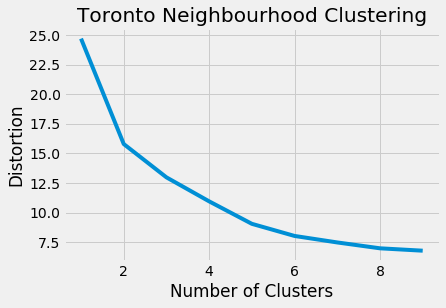

In [43]:
# Plot the squared standard error for the model against the number of clusters

#plt.figure(figsize=(16,8))
plt.style.use("fivethirtyeight")
#plt.plot(K, SSE, 'bx-')
plt.plot(K, distortion)
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Toronto Neighbourhood Clustering')
plt.show()


In [44]:
# Install the Yellowbrick module if not installed

#!pip install yellowbrick

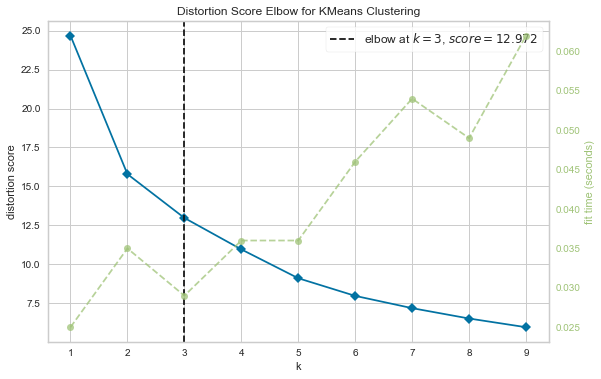


Optimal number of clusters: 3



In [45]:
# Determine the optimal KMeans model using Yellowbrick visualizer module

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df_tmp)        # Fit the data to the visualizer
visualizer.show()             # Finalize and render the figure

print("\nOptimal number of clusters: {}\n".format(visualizer.elbow_value_))


In [70]:
# Save the neighbourhood cluster assignments for the optimal model

opt_model = visualizer.elbow_value_   # optimal KMeans model from Yellowbrick analysis

model = KMeans(n_clusters=opt_model, init="random", max_iter=300, random_state=0)
model.fit(df_tmp)

df_rank["Cluster"] = model.predict(df_tmp)

#df_rank


In [47]:
# Save the dataframe to file

df_rank.to_csv('df_rank.csv')


In [48]:
# Read the dataframe from file

df_rank = pd.read_csv('df_rank.csv', index_col=0)
df_rank


,Code,Neighbourhood,Latitude,Longitude,Area,Population,Expats,Businesses,LocalEmployment,HomePrices,MajorCrimes,VehicleThefts,Score,Rank,Cluster
0,1,West Humber-Clairville,43.735990,-79.276510,139.0,12.0,3.0,4.0,3.0,121.0,139.0,140.0,561.0,68.0,0
1,2,Mount Olive-Silverstone-Jamestown,43.657000,-79.428000,88.0,13.0,6.0,84.0,85.0,137.0,126.0,130.5,669.5,129.0,1
2,3,Thistletown-Beaumond Heights,43.779280,-79.303700,71.0,123.0,40.5,95.0,122.0,94.0,41.0,30.0,616.5,105.0,2
3,4,Rexdale-Kipling,43.729200,-79.403250,52.0,122.0,42.0,116.5,126.0,101.0,26.0,59.5,645.0,118.5,2
4,5,Elms-Old Rexdale,43.756868,-79.385751,62.0,131.0,55.0,134.5,134.0,139.0,35.5,74.0,765.0,140.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,West Hill,43.724880,-79.253970,130.0,26.0,8.0,56.5,66.0,125.0,130.0,120.0,661.5,122.0,1
136,137,Woburn,43.787490,-79.150770,134.0,2.0,5.0,15.0,19.0,122.0,132.0,118.5,547.5,58.0,0
137,138,Eglinton East,43.737390,-79.410930,68.0,39.0,9.0,82.0,98.0,133.0,115.0,77.5,621.5,106.0,1
138,139,Scarborough Village,43.690160,-79.475000,67.0,71.0,14.0,94.0,109.0,112.0,113.0,91.0,671.0,131.0,1


In [49]:
# Print row count statistics for the dataframe

print("Dataframe: \t\t", "df_rank")
print("Dataframe shape: \t", df_rank.shape)
print("Number of rows: \t", df_rank.shape[0])
print("Neighbourhoods: \t", len(df_rank["Neighbourhood"].unique()))

Dataframe: 		 df_rank
Dataframe shape: 	 (140, 15)
Number of rows: 	 140
Neighbourhoods: 	 140


#### __DATA VISUALIZATION__

__Neighbourhood Ranking__

In [50]:
# Create map of the Greater Toronto Area and display the top ranked neighbourhoods 

import folium

map_nh = folium.Map(location=[lat_to, long_to], titles="Top Ranked Neighbourhoods", zoom_start=12)

# highlight the top ranked neighbourhoods in a different color

n_nh = 5  # highlight the top ranked neighbourhoods in a different color
colors = ['red', 'purple','blue', 'orange', 'green', 'black', 'beige']

for code, lat, long, rank in zip(df_rank["Code"], df_rank["Latitude"], df_rank["Longitude"],  df_rank["Rank"]):
    
   # highlight the top ranked neighbourhoods in a different color
   if rank < n_nh+1:
      col = colors[0]
   else:
      #col = colors[1]
      continue
        
   # show colored markers for the neighbourhoods 
   folium.CircleMarker( 
      [lat, long],
      popup = folium.Popup("#{}\n{}".format(rank, code), parse_html=True),
      color = col,
      fill = True,
      fill_color = col,
      fill_opacity = 0.7,
      parse_html = False).add_to(map_nh)  
    
map_nh


__Neighbourhood Clustering__

In [51]:
# Create map of the Greater Toronto Area and display the optimal clustered neighbourhoods 

import folium

map_cl = folium.Map(location=[lat_to, long_to], titles="Clustered Neighbourhoods", zoom_start=12)

# highlight the neighbourhood clusterss in a different color

colors = ['blue', 'red','purple', 'orange', 'green', 'black', 'beige']
for code, lat, long, cluster in zip(df_rank["Code"], df_rank["Latitude"], df_rank["Longitude"],  df_rank["Cluster"]):
        
   # show colored markers for the neighbourhoods 
   folium.CircleMarker( 
      [lat, long],
      popup = folium.Popup("#{}\n{}".format(cluster, code), parse_html=True),
      color = colors[cluster],
      fill = True,
      fill_color = colors[cluster],
      fill_opacity = 0.7,
      parse_html = False).add_to(map_cl)  
    
map_cl


### __[2] Neighbourhood Profiles - Venue Analysis__

This section of the notebook develops a profile for each of the neighbourhoods based on the venues that are located in the area using the FourSquare API. The determination of best locations is further enhanced by grouping neighbourhoods into clusters based on the similarity of tits venues.

#### __DATA EXTRACTION__

In [52]:
# Retrieve Foursquare credentials from file

import json

secrets = json.load(open("secrets.json"))
CLIENT_ID = secrets["CLIENT_ID"]
CLIENT_SECRET = secrets["CLIENT_SECRET"]
VERSION = secrets["VERSION"]
LIMIT = secrets["LIMIT"]     

print('FourSquare Credentails: \n')
print('CLIENT_ID: \t', CLIENT_ID)
print('CLIENT_SECRET: \t', CLIENT_SECRET) 
print('VERSION: \t', VERSION) 
print('LIMIT: \t\t', LIMIT) 


FourSquare Credentails: 

CLIENT_ID: 	 2KCKB0CN1JSW0DRVY0VIVLJASZS0UY5XBFN0HKH2QZK5UHEF
CLIENT_SECRET: 	 FAFGJMGKW1EZZEMLOJUHOHIA3O4HJJDO424O5JWOJ2QUTWOI
VERSION: 	 20180605
LIMIT: 		 100


In [53]:
# Function to retrieve nearby venues given the latitude and longitude 

import requests

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):  
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
            'NeighbourhoodLatitude', 
            'NeighbourhoodLongitude', 
            'Venue', 
            'VenueLatitude', 
            'VenueLongitude', 
            'VenueCategory']
    
    return(nearby_venues)


In [56]:
# Retrieve venues located within a 1609 meter (1 mile) radius in the neighbourhood using the FourSquare API 

df_venues = getNearbyVenues(names=df_gta['Neighbourhood'], latitudes=df_gta['Latitude'], longitudes=df_gta['Longitude'], radius=1609)


In [ ]:
# Save the dataframe to file

df_venues.to_csv('df_venues.csv')


In [57]:
# Read the dataframe from file

df_venues = pd.read_csv('df_venues.csv', index_col=0)
df_venues


,Neighbourhood,NeighbourhoodLatitude,NeighbourhoodLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
0,West Humber-Clairville,43.73599,-79.27651,Baran's Turkish Restaurant & Bar,43.728978,-79.280811,Turkish Restaurant
1,West Humber-Clairville,43.73599,-79.27651,PetSmart,43.729945,-79.282226,Pet Store
2,West Humber-Clairville,43.73599,-79.27651,Vienna Fine Foods,43.733639,-79.279298,Deli / Bodega
3,West Humber-Clairville,43.73599,-79.27651,Adonis,43.729188,-79.290391,Grocery Store
4,West Humber-Clairville,43.73599,-79.27651,Costco Business Center,43.730879,-79.283413,Warehouse Store
...,...,...,...,...,...,...,...
9006,Guildwood,43.79813,-79.38297,The Pickle Barrel,43.799470,-79.369084,Restaurant
9007,Guildwood,43.79813,-79.38297,Steeles & Bayview,43.802683,-79.395934,Intersection
9008,Guildwood,43.79813,-79.38297,Kaga Sushi,43.787758,-79.381090,Japanese Restaurant
9009,Guildwood,43.79813,-79.38297,Bayview Arena,43.788124,-79.393966,Skating Rink


In [58]:
# Print the number of rows in the dataframe

print("Dataframe: \t\t", "df_venues")
print("Dataframe shape: \t", df_venues.shape)
print("Number of rows: \t", df_venues.shape[0])
print("Neighbourhoods: \t", len(df_venues["Neighbourhood"].unique()))
print("Venue Categories: \t", len(df_venues["VenueCategory"].unique()))
print("Venues: \t\t", len(df_venues["Venue"].unique()))


Dataframe: 		 df_venues
Dataframe shape: 	 (9011, 7)
Number of rows: 	 9011
Neighbourhoods: 	 140
Venue Categories: 	 343
Venues: 		 3145


#### __MODEL DEVELOPMENT__

__Venue Ranking__

In [59]:
# Onehot encode the venue categories as numeric column attributes

df_onehot = pd.get_dummies(df_venues[['VenueCategory']], prefix="", prefix_sep="")
df_onehot["Neighbourhood"] = df_venues["Neighbourhood"] 

cols = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[cols]

### Compute the average frequency of venues in each category

df_onehot = df_onehot.groupby('Neighbourhood').mean().reset_index()


In [60]:
# Save the dataframe to file

df_onehot.to_csv('df_onehot.csv')

In [61]:
# Read the dataframe from file

df_onehot = pd.read_csv('df_onehot.csv', index_col=0)


In [62]:
# Print the number of rows in the dataframe

print("Dataframe: \t\t", "df_onehot")
print("Dataframe shape: \t", df_onehot.shape)
print("Number of rows: \t", df_onehot.shape[0])
print("Neighbourhoods: \t", len(df_onehot["Neighbourhood"].unique()))
print("Venue Categories: \t",df_onehot.shape[1]-1)


Dataframe: 		 df_onehot
Dataframe shape: 	 (140, 344)
Number of rows: 	 140
Neighbourhoods: 	 140
Venue Categories: 	 343


In [63]:
# Display the top venue categories for each neighbourhood

n_cat = 10   # number of venue categories 

cols = ["Neighbourhood"]
for i in range(1,n_cat+1):
    cols.append("Top {}".format(i))
    
df_top = pd.DataFrame(columns=cols)
df_top["Neighbourhood"] = df_gta["Neighbourhood"]

# select the top venue categories and update each neighbourhoods

for n in range(len(df_top)):
    df_top.iloc[n, 1:] = df_onehot.iloc[n, 1:].sort_values(ascending=False).index.values[0:n_cat]

df_top

,Neighbourhood,Top 1,Top 2,Top 3,Top 4,Top 5,Top 6,Top 7,Top 8,Top 9,Top 10
0,West Humber-Clairville,Coffee Shop,Grocery Store,Gas Station,Café,Hotel,Chinese Restaurant,Restaurant,Steakhouse,Bank,Swiss Restaurant
1,Mount Olive-Silverstone-Jamestown,Coffee Shop,Park,Convenience Store,Pizza Place,Pharmacy,Fast Food Restaurant,Grocery Store,Sandwich Place,Gym / Fitness Center,Bank
2,Thistletown-Beaumond Heights,Indian Restaurant,Bank,Coffee Shop,Pharmacy,Caribbean Restaurant,Fried Chicken Joint,Fast Food Restaurant,Supermarket,Shopping Mall,Beer Store
3,Rexdale-Kipling,Coffee Shop,Sandwich Place,Pizza Place,Fast Food Restaurant,Gas Station,Restaurant,Asian Restaurant,Rental Car Location,Storage Facility,Grocery Store
4,Elms-Old Rexdale,Sandwich Place,Fast Food Restaurant,Restaurant,Gas Station,Asian Restaurant,Bowling Alley,Convenience Store,Pizza Place,Bookstore,Salon / Barbershop
...,...,...,...,...,...,...,...,...,...,...,...
135,West Hill,Pizza Place,Park,Fast Food Restaurant,Breakfast Spot,Hotel,Bank,Greek Restaurant,Fried Chicken Joint,Bar,Liquor Store
136,Woburn,Fast Food Restaurant,Pizza Place,Coffee Shop,Park,Sandwich Place,Department Store,Discount Store,Pharmacy,Grocery Store,Diner
137,Eglinton East,Pharmacy,Sandwich Place,Coffee Shop,Beer Store,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Gym,Big Box Store,Bistro
138,Scarborough Village,Coffee Shop,Sandwich Place,Fast Food Restaurant,Park,Fried Chicken Joint,Beer Store,Seafood Restaurant,Big Box Store,Supermarket,Grocery Store


In [64]:
# Print the number of rows in the dataframe

print("Dataframe: \t\t", "df_top")
print("Dataframe shape: \t", df_top.shape)
print("Number of rows: \t", df_top.shape[0])
print("Neighbourhoods: \t", len(df_top["Neighbourhood"].unique()))


Dataframe: 		 df_top
Dataframe shape: 	 (140, 11)
Number of rows: 	 140
Neighbourhoods: 	 140


__Venue Clustering__

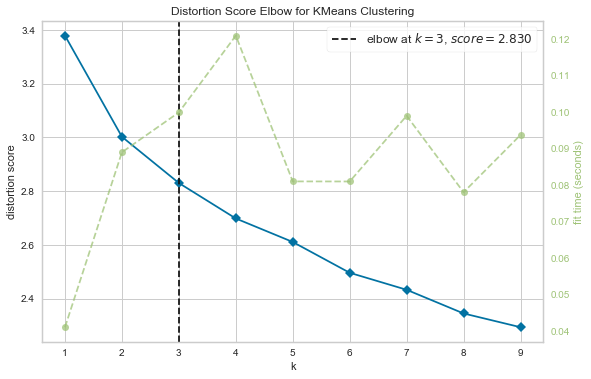


Optimal number of clusters: 3



In [65]:
# Determine the optimal KMeans model using Yellowbrick visualizer module

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer

df_tmp = df_onehot.iloc[:,1:] # copy all columns except Neighbourhood

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df_tmp)       # Fit the data to the visualizer
visualizer.show()             # Finalize and render the figure

print("\nOptimal number of clusters: {}\n".format(visualizer.elbow_value_))


In [66]:
# Save the venue cluster assignments for the optimal model

opt_model = visualizer.elbow_value_   # optimal KMeans model from Yellowbrick analysis

model = KMeans(n_clusters=opt_model, init="random", max_iter=300, random_state=0)
model.fit(df_tmp)

df_rank["VenueCluster"] = model.predict(df_tmp)


In [67]:
# Save the dataframe to file

df_rank.to_csv('df_rank.csv')


In [68]:
# Read the dataframe from file

df_rank = pd.read_csv('df_rank.csv', index_col=0)
df_rank


,Code,Neighbourhood,Latitude,Longitude,Area,Population,Expats,Businesses,LocalEmployment,HomePrices,MajorCrimes,VehicleThefts,Score,Rank,Cluster,VenueCluster
0,1,West Humber-Clairville,43.735990,-79.276510,139.0,12.0,3.0,4.0,3.0,121.0,139.0,140.0,561.0,68.0,0,1
1,2,Mount Olive-Silverstone-Jamestown,43.657000,-79.428000,88.0,13.0,6.0,84.0,85.0,137.0,126.0,130.5,669.5,129.0,1,1
2,3,Thistletown-Beaumond Heights,43.779280,-79.303700,71.0,123.0,40.5,95.0,122.0,94.0,41.0,30.0,616.5,105.0,2,1
3,4,Rexdale-Kipling,43.729200,-79.403250,52.0,122.0,42.0,116.5,126.0,101.0,26.0,59.5,645.0,118.5,2,1
4,5,Elms-Old Rexdale,43.756868,-79.385751,62.0,131.0,55.0,134.5,134.0,139.0,35.5,74.0,765.0,140.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,West Hill,43.724880,-79.253970,130.0,26.0,8.0,56.5,66.0,125.0,130.0,120.0,661.5,122.0,1,1
136,137,Woburn,43.787490,-79.150770,134.0,2.0,5.0,15.0,19.0,122.0,132.0,118.5,547.5,58.0,0,1
137,138,Eglinton East,43.737390,-79.410930,68.0,39.0,9.0,82.0,98.0,133.0,115.0,77.5,621.5,106.0,1,1
138,139,Scarborough Village,43.690160,-79.475000,67.0,71.0,14.0,94.0,109.0,112.0,113.0,91.0,671.0,131.0,1,1


#### __DATA VISUALIZATION__

__Venue Clustering__

In [69]:
# Create map of the Greater Toronto Area and display the optimal clustered neighbourhoods 

import folium

map_vcl = folium.Map(location=[lat_to, long_to], titles="Venue Clustered Neighbourhoods", zoom_start=12)

# highlight the neighbourhood clusterss in a different color

colors = ['red', 'blue','purple', 'orange', 'green', 'black', 'beige']
for code, lat, long, cluster in zip(df_rank["Code"], df_rank["Latitude"], df_rank["Longitude"],  df_rank["VenueCluster"]):
        
   # show colored markers for the neighbourhoods 
   folium.CircleMarker( 
      [lat, long],
      popup = folium.Popup("#{}\n{}".format(cluster, code), parse_html=True),
      color = colors[cluster],
      fill = True,
      fill_color = colors[cluster],
      fill_opacity = 0.7,
      parse_html = False).add_to(map_vcl)  
    
map_vcl
